In [1]:
import zipfile
with zipfile.ZipFile('archive.zip') as zip_file:
    zip_file.extractall('./dataset')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
columns = [
    'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'
    ]

In [14]:
house = pd.read_csv('dataset/housing.csv', header=None, delimiter=r"\s+", names=columns)
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
print(house.shape)

(506, 14)


In [17]:
print(house.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [24]:
house.values.shape

(506, 14)

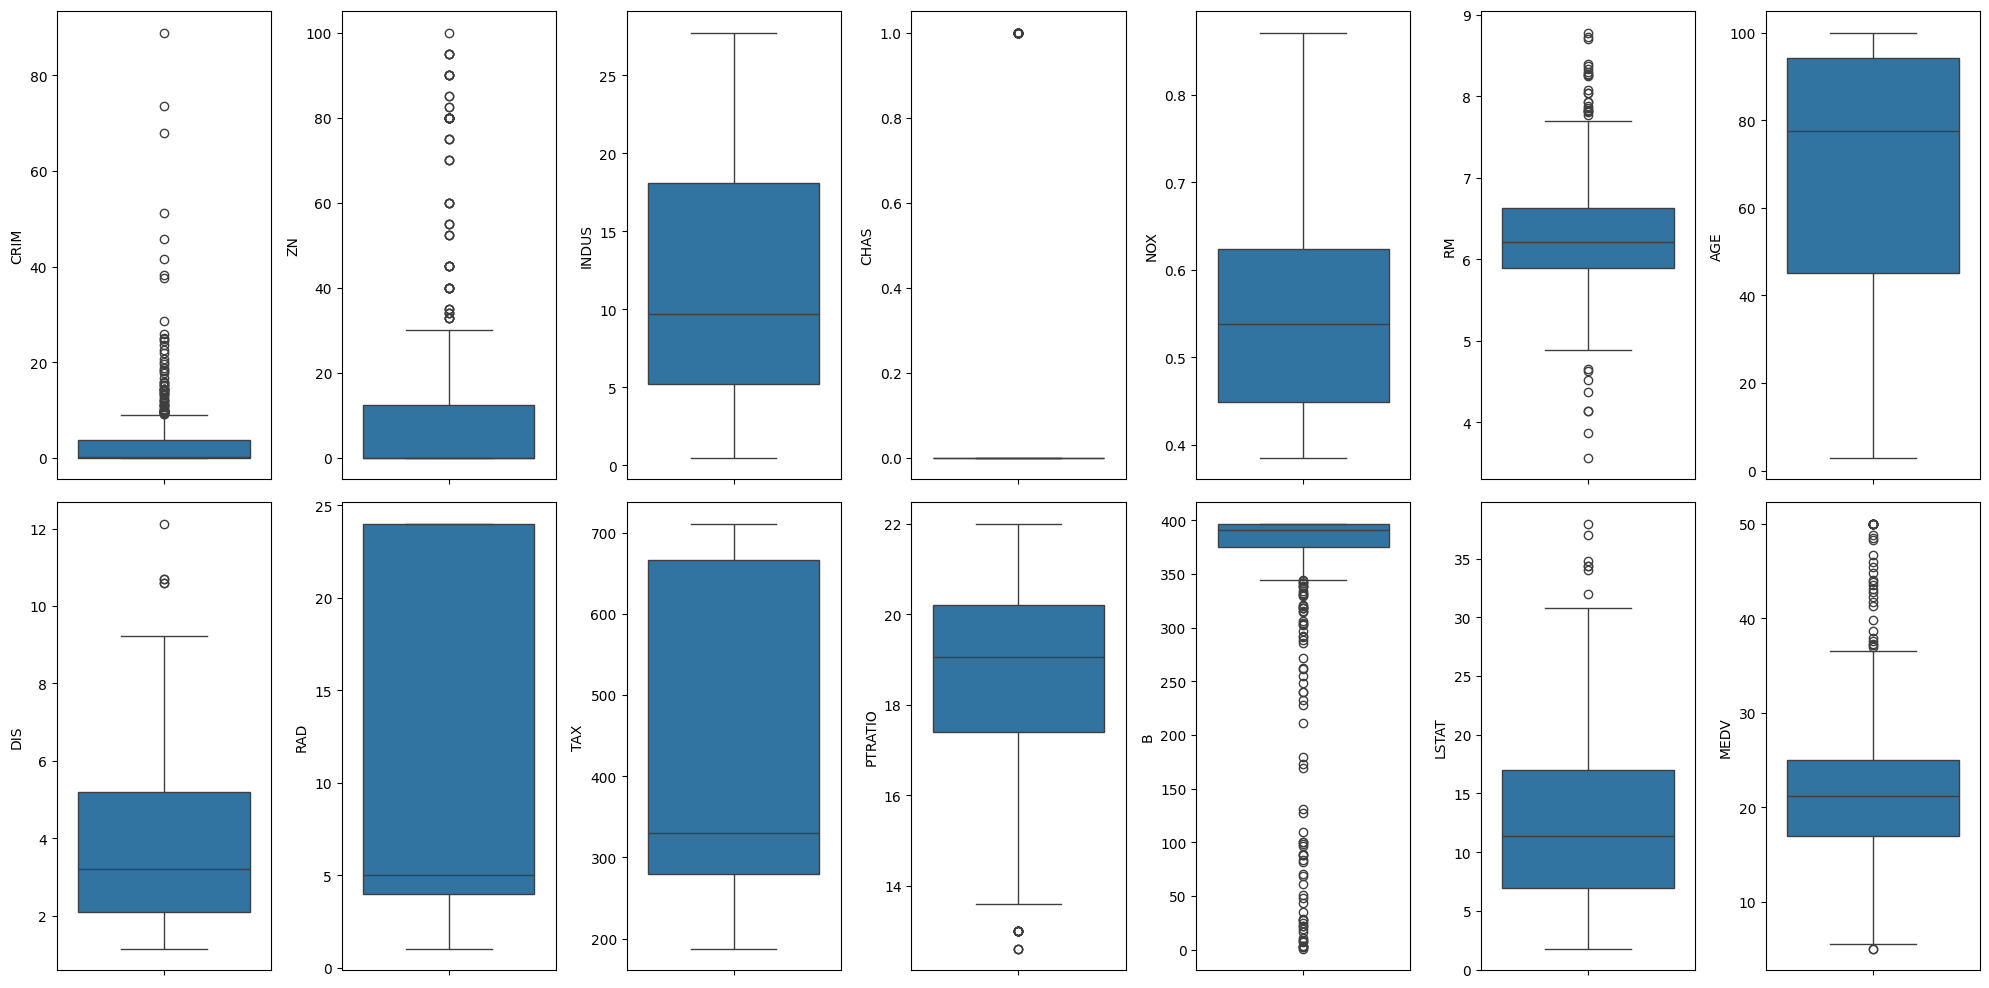

In [26]:
fig, axs = plt.subplots(2,7, figsize=(20,10))
axs = axs.flatten()
for n, (k, v) in enumerate(house.items()):
    sns.boxplot(y=k, data=house, ax=axs[n])

plt.tight_layout()


In [40]:
for i in house.columns:
    q1 = house[i].quantile(0.25)
    q3 = house[i].quantile(0.75)
    IRQ = q3 - q1
    house_over = house[i][(house[i]<=q1-1.5*IRQ) | (house[i]>=q3+1.5*IRQ)]
    print(i, len(house_over)/len(house)*100)

CRIM 13.043478260869565
ZN 13.438735177865613
INDUS 0.0
CHAS 100.0
NOX 0.0
RM 5.928853754940711
AGE 0.0
DIS 0.9881422924901186
RAD 0.0
TAX 0.0
PTRATIO 2.9644268774703555
B 15.217391304347828
LSTAT 1.383399209486166
MEDV 7.905138339920949


In [45]:
house = house[~(house['MEDV']>=50)]
print(house.shape)

(490, 14)


/tmp/ipykernel_143917/2728186090.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house[i],ax = axes[n])
/tmp/ipykernel_143917/2728186090.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house[i],ax = axes[n])
/tmp/ipykernel_143917/2728186090.py:4: UserWarning: 

`distplot` is a deprecated

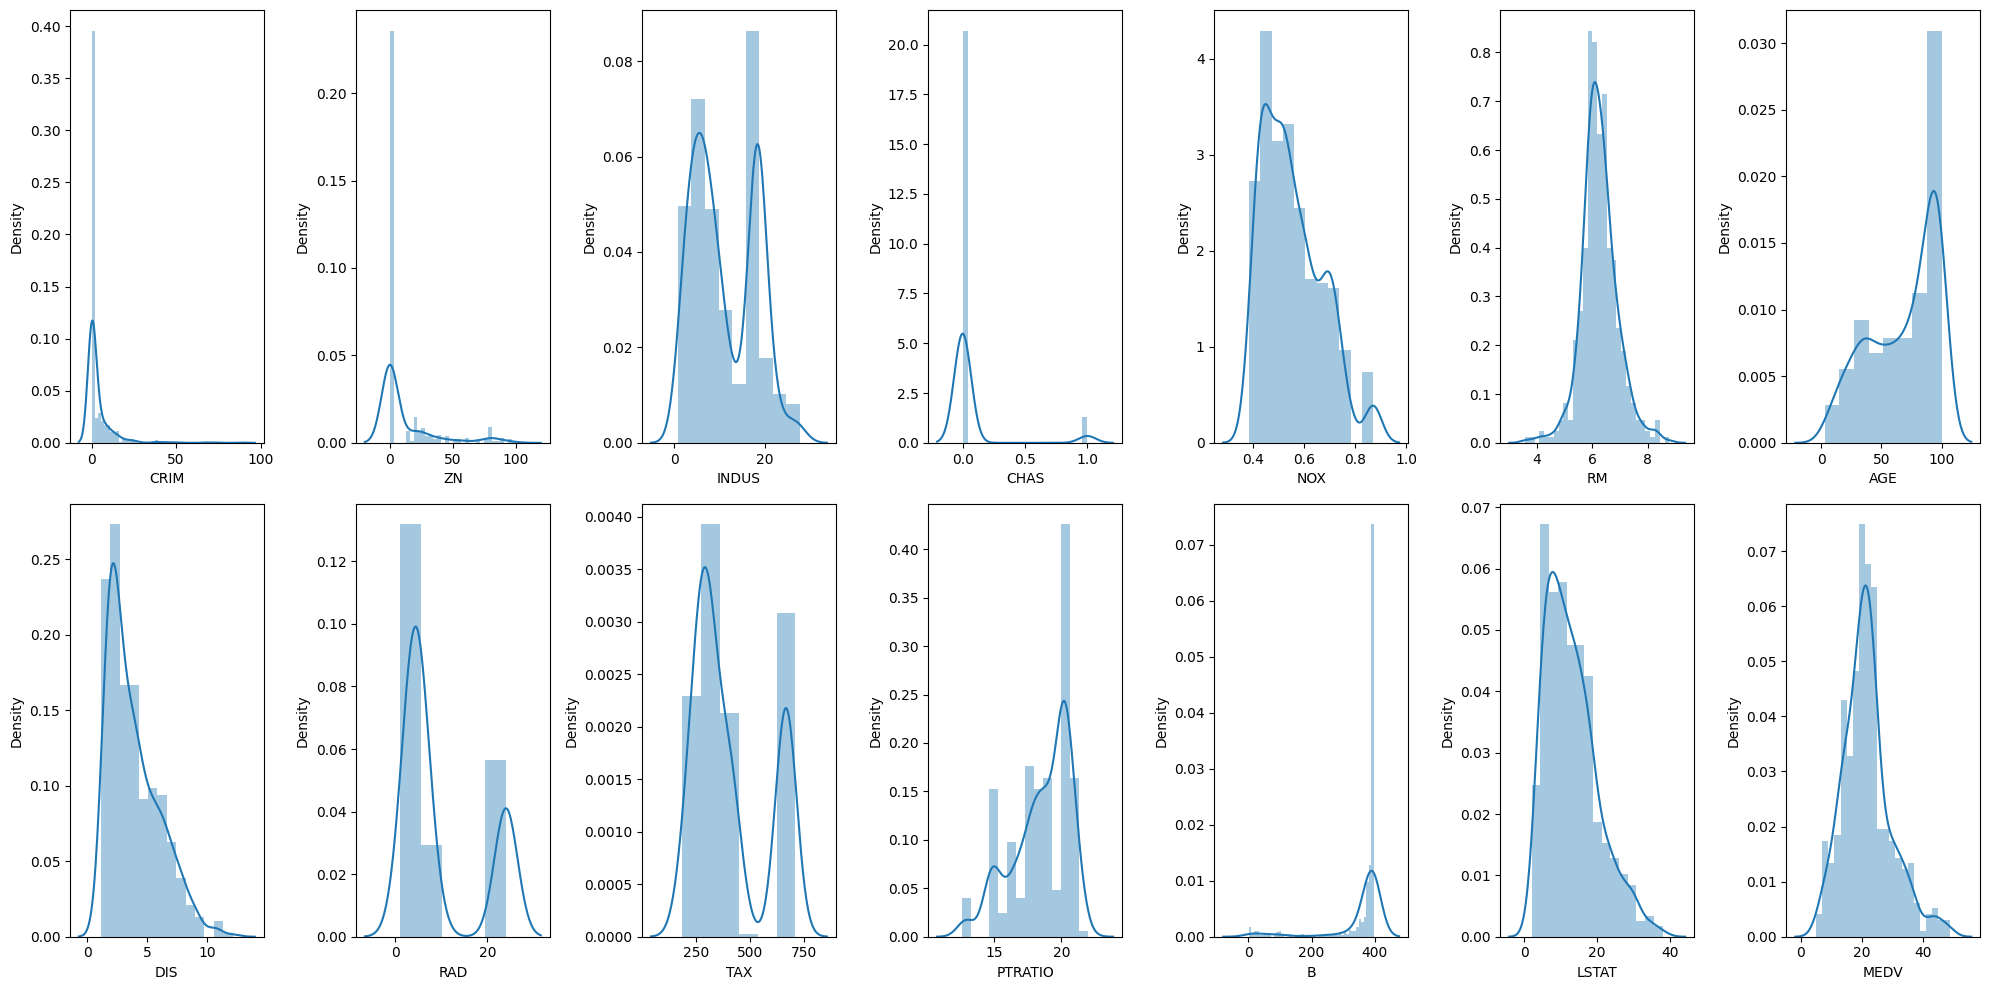

In [49]:
fig, axes = plt.subplots(2,7,figsize = (20,10))
axes = axes.flatten()
for n,i in enumerate(house.columns):
    sns.distplot(house[i],ax = axes[n])
plt.tight_layout()

1.200489529474767


/tmp/ipykernel_143917/4090641922.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(house['ZN']))


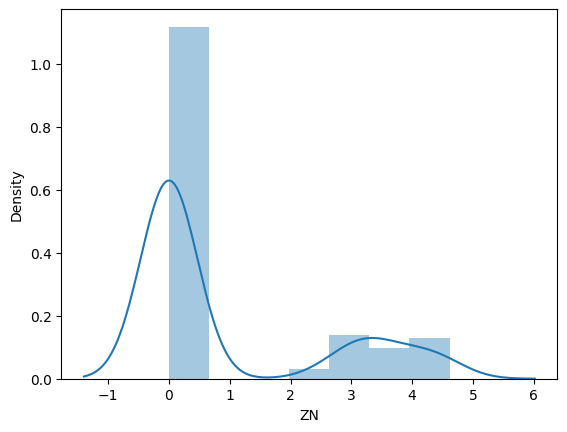

In [75]:
sns.distplot(np.log1p(house['ZN']))
print(np.log1p(house['ZN']).skew())

2.241577628695278


/tmp/ipykernel_143917/2414621088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house['ZN'])


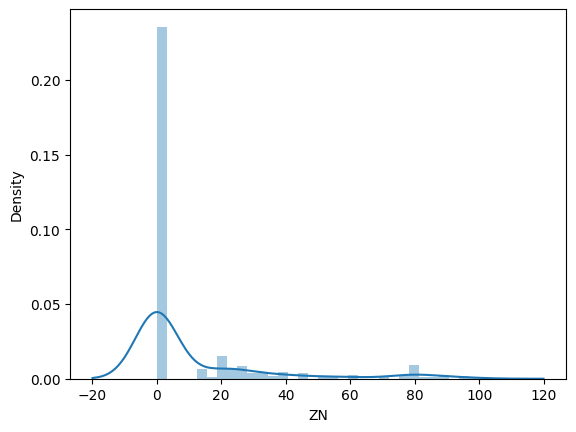

In [74]:
sns.distplot(house['ZN'])
print(house['ZN'].skew())

In [58]:
house.corrwith(house['MEDV'])

CRIM      -0.450115
ZN         0.404608
INDUS     -0.600005
CHAS       0.074803
NOX       -0.524451
RM         0.686634
AGE       -0.492915
DIS        0.368813
RAD       -0.476296
TAX       -0.572442
PTRATIO   -0.518641
B          0.364928
LSTAT     -0.759837
MEDV       1.000000
dtype: float64

<Axes: >

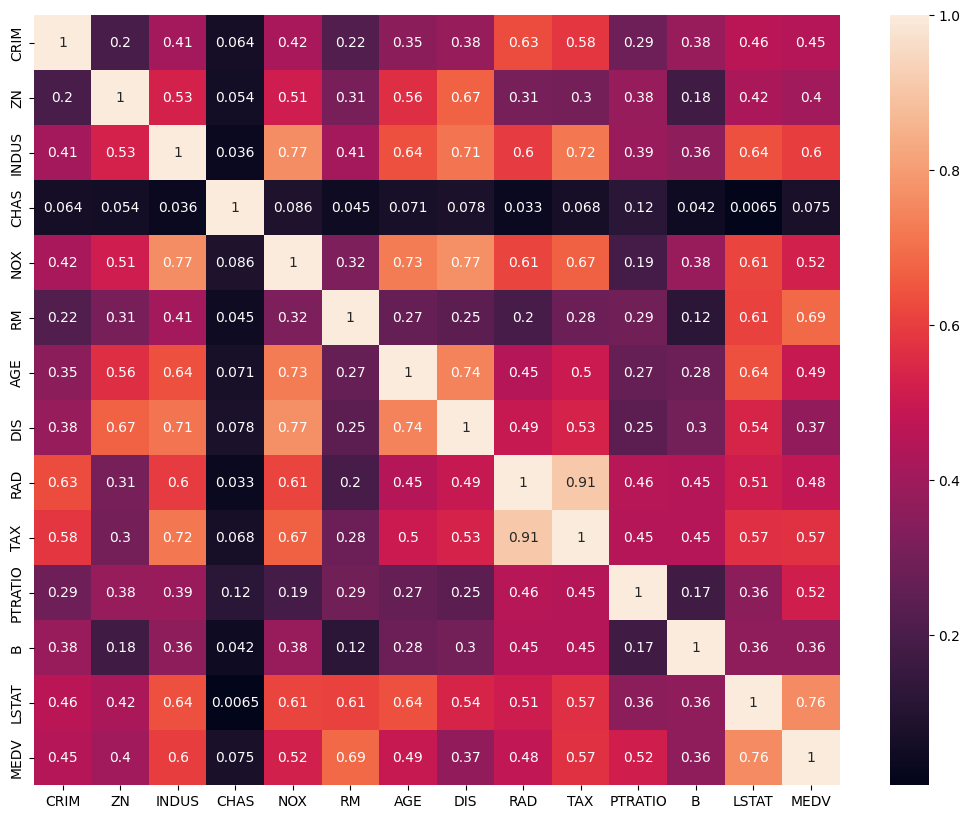

In [55]:
plt.figure(figsize=(13,10))

sns.heatmap(house.corr().abs(), annot=True)

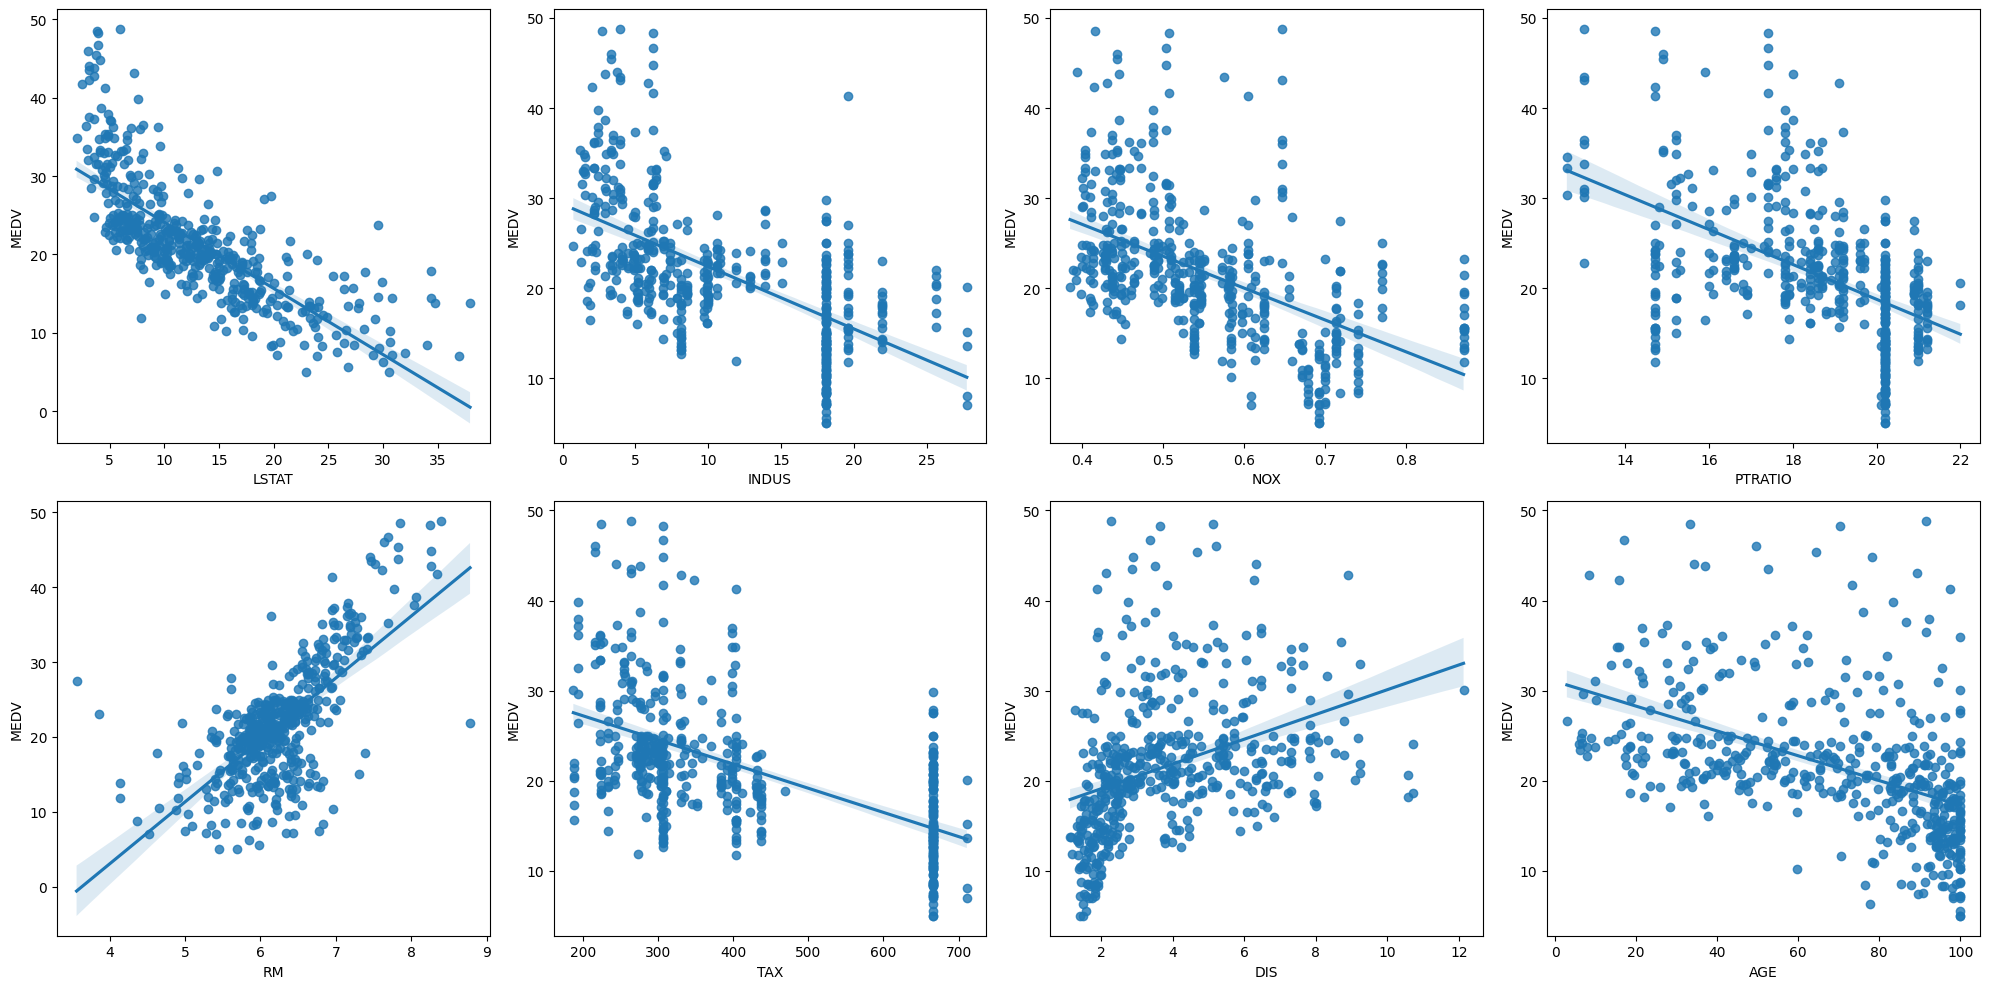

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

fig, axes = plt.subplots(2,4,figsize=(20,10))
axes = axes.flatten()
for n,i in enumerate(column_sels):
    X = house[i]
    y = house['MEDV']
    sns.regplot(y=y,x=X,data=house,ax=axes[n])
plt.tight_layout()
plt.show()


/tmp/ipykernel_143917/3675022421.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=np.log1p(y))
/tmp/ipykernel_143917/3675022421.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=y)


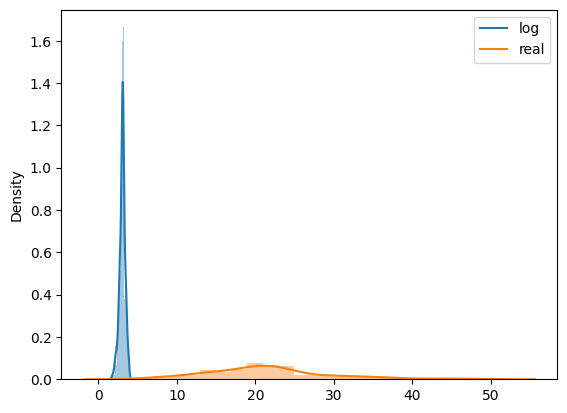

In [69]:
sns.distplot(x=np.log1p(y))
sns.distplot(x=y)
plt.legend(['log','real'])

In [ ]:
for i in house.columns:
    if house[i].skew()>=0.3:
        house[i] = np.log1p(house[i])

In [82]:
house['MEDV'].where(house['MEDV']>25,-house['MEDV'])

0     -24.0
1     -21.6
2      34.7
3      33.4
4      36.2
       ... 
501   -22.4
502   -20.6
503   -23.9
504   -22.0
505   -11.9
Name: MEDV, Length: 490, dtype: float64